In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the CSV file
data1 = pd.read_csv('Problem1_PartA.dat', sep=r'\s+', header=None)
data1.columns = ['k', 'N', 'pi_calculated', 'absolute_error']
data1



,k,N,pi_calculated,absolute_error
0,2,100,3.320000,0.178407
1,3,1000,3.180000,0.038407
2,4,10000,3.135600,0.005993
3,5,100000,3.142640,0.001047
4,6,1000000,3.140924,0.000669
5,7,10000000,3.141796,0.000203
6,8,100000000,3.141879,0.000286
7,9,1000000000,3.141526,0.000067
8,10,1410065408,3.141551,0.000042


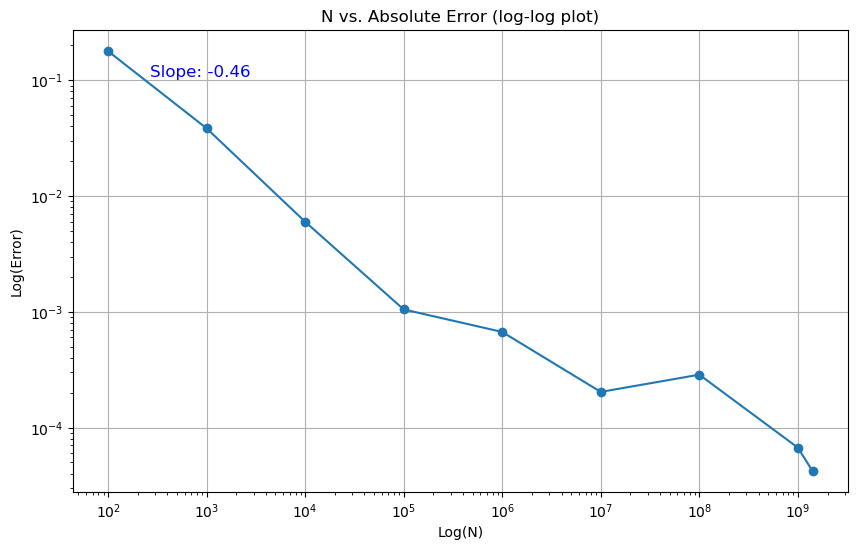

In [4]:
########### LOG-LOG PLOT FOR ONE DAT FILE: PROBLEM1_PARTA.DAT #############

N = data1['N']
Absolute_Error = data1['absolute_error']

# Create a log-log plot
plt.figure(figsize=(10, 6))
plt.loglog(N, Absolute_Error, marker='o', linestyle='-')
plt.xlabel('Log(N)')
plt.ylabel('Log(Error)')
plt.title('N vs. Absolute Error (log-log plot)')
plt.grid(True)

# Slope
log_N = np.log(N)
log_error = np.log(Absolute_Error)
slope, intercept = np.polyfit(log_N, log_error, 1)

line = np.exp(intercept) * N**slope
plt.annotate(f'Slope: {slope:.2f}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12, color='b')

plt.show()

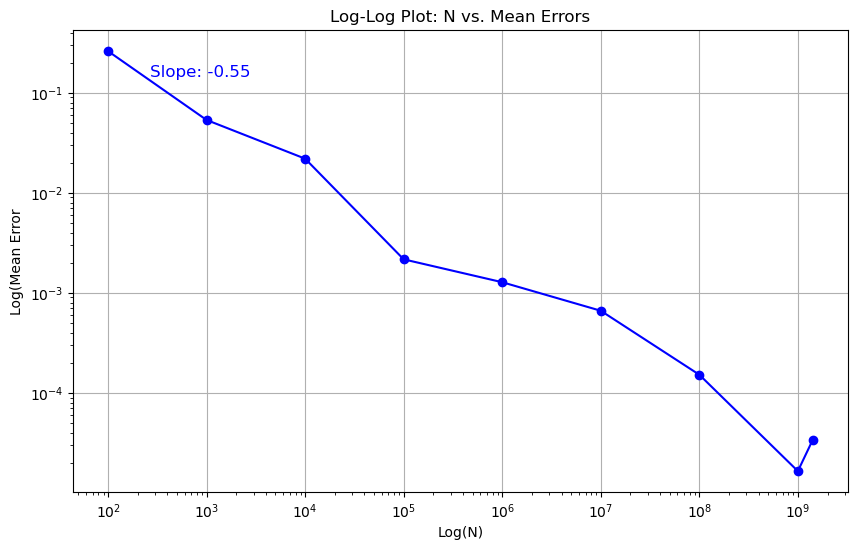

In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data_file = 'Problem1_data_files'

mean_errors = {}
mean_error_values = []

for N in range(1, 11):
    filename = f'timing{N}.dat'
    filepath = os.path.join(data_file, filename)
    
    with open(filepath, 'r') as file:
        for line in file:
            N, error, runtime = map(float, line.split())
            if N not in mean_errors:
                mean_errors[N] = []
            mean_errors[N].append(error)

for N, errors in sorted(mean_errors.items()):
    mean_error = sum(errors) / len(errors)
    mean_error_values.append(mean_error)

# log-log plot of N vs. mean errors
plt.figure(figsize=(10, 6))
N_values = sorted(mean_errors.keys())
plt.loglog(N_values, mean_error_values, marker='o', linestyle='-', color='b')
plt.title('Log-Log Plot: N vs. Mean Errors')
plt.xlabel('Log(N)')
plt.ylabel('Log(Mean Error')
plt.grid(True)

log_N1 = np.log(N_values)
log_error1 = np.log(mean_error_values)
slope, intercept = np.polyfit(log_N1, log_error1, 1)

line = np.exp(intercept) * np.array(N_values)**slope
plt.annotate(f'Slope: {slope:.2f}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12, color='b')

plt.show()
